The goal of this case study is to import a data set that has a list of insurances chargers for customers with certain a attributes this data analysis is going to examine the data and have a close look at the relationship between bmi and charges and then add in the addition attribute of being a smoker and see how these two health attributes affect the charges for insurance. 

# Section 1 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This describe funtion gives us a great overview of the data with each column having its own description as well being able to see the upper and lower limits of the data set in every category. This will be used to be able to set limits when analysing the data to find outcomes. 


Number of smokers is 274
number of non smokers is 1064


This function above shows the total amount of people that smoke vs people that dont smoke this being a non integer value means it was excluded from the describe function used above so its good to see the tally of both.

In [6]:
df.shape

(1338, 7)

THis function shows that there is 7 different categories with over 1300 rows in the whole dataset 

In [8]:
sex = 'sex'
num_male = df[sex].eq('male').sum()
num_female = df[sex].eq('female').sum()

print("There is", num_male,"males in the dataset")
print("There is", num_female, "females in the dataset")

There is 676 males in the dataset
There is 662 females in the dataset


This function gives the ability to count how many males and how many females are in this dataset this is another count that wasnt able to be in the describe function as it doesnt have a numrical value. 

In [9]:
smokers = 'smoker'
num_yes = df[smokers].eq('yes').sum()
num_no = df[smokers].eq('no').sum()

print("Number of smokers is", num_yes)
print("number of non smokers is", num_no)

Number of smokers is 274
number of non smokers is 1064


This function above shows the total amount of people that smoke vs people that dont smoke this being a non integer value means it was excluded from the describe function used above so its good to see the tally of both.

# Section 2 

In this section i will use two groupby functions to comapre to aspects of the data set,

The firstv aspect the section will look at is the average charges for smokers vs non smokers to analise the effeect smoking has on the amount of insurance a person will have to pay 

The second aspect the section will look at is if their is a difference in insurance charges that people have to pay based on gender. 

In [19]:
average_charges_by_smoker = df.groupby('smoker')['charges'].mean()
max_charges_by_smoker = df.groupby('smoker')['charges'].max()
min_charges_by_smoker = df.groupby('smoker')['charges'].min()

# Print the average charges for smokers and non-smokers
print("Average charges for smokers:",average_charges_by_smoker['yes'])

print("\nMax charges payed by smokers:",max_charges_by_smoker['yes'])

print("\nMin charges payed by smokers:",min_charges_by_smoker['yes'])


print("\nAverage charges for non-smokers:",average_charges_by_smoker['no'])

print("\nMax charges payed by non-smokers:",max_charges_by_smoker['no'])

print("\nMin charges payed by non-smokers:",min_charges_by_smoker['no'])


Average charges for smokers: 32050.23183153285

Max charges payed by smokers: 63770.42801

Min charges payed by smokers: 12829.4551

Average charges for non-smokers: 8434.268297856202

Max charges payed by non-smokers: 36910.60803

Min charges payed by non-smokers: 1121.8739


The outcome of this function shows that the charge for people that smoke is significantly higher then for people that dont smoke. This outcome makes sense for the data set being charges for insurance as smoking puts people at a higher risk of health problems. This outcome shows that the min amount payed by a smoker is over 10 times the amount that a non-smoker has to pay, while the max a smoker has payed is over double the amount a non-smoker has paid. 

In [11]:
average_charges_by_sex = df.groupby('sex')['charges'].mean()

print("Average charges for males:")
print(average_charges_by_sex['male'])

print("Average charges for females")
print(average_charges_by_sex['female'])

Average charges for males:
13956.751177721893
Average charges for females
12569.578843835347


# Section 3 

Mean Squared Error: 47863804.21466604
R-squared: 0.691696004503571


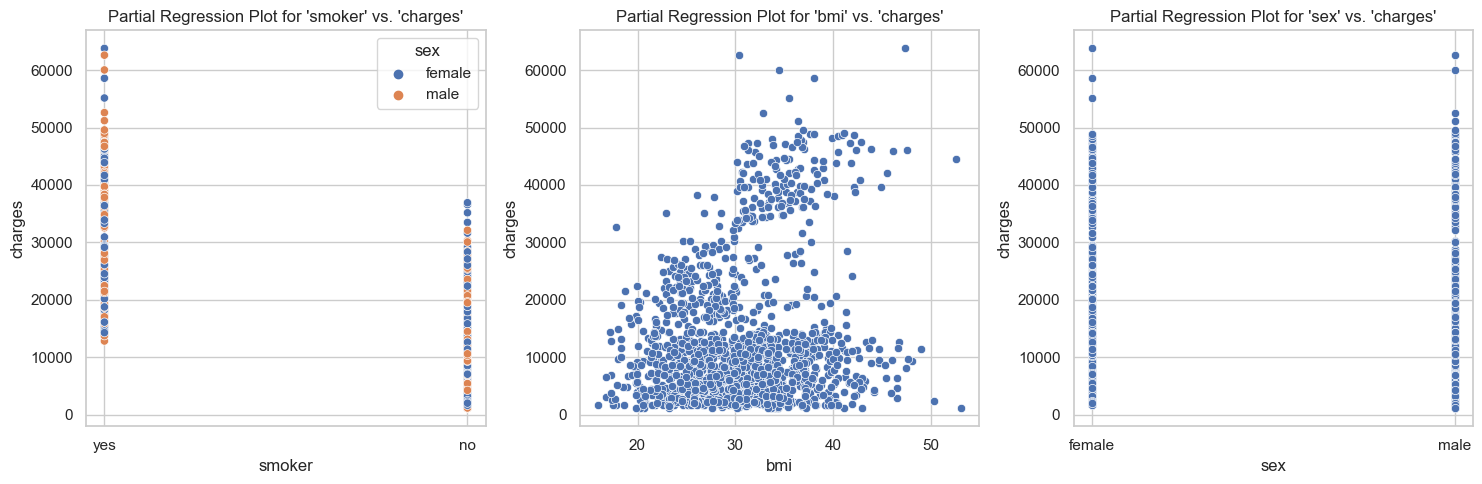

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the sample insurance dataset from Seaborn
df = pd.read_csv("insurance.csv")

# Split the data into training and testing sets
X = df[['sex', 'smoker', 'bmi']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables (sex and smoker) using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(15, 5))

# Partial Regression Plot for "smoker" vs. "charges" while holding "bmi" and "sex" constant
plt.subplot(131)
sns.plotting_context(rc={"axes.labelsize": 12})
sns.set_style("whitegrid")
sns.scatterplot(x="smoker", y="charges", data=df, hue="sex")
plt.title("Partial Regression Plot for 'smoker' vs. 'charges'")

# Partial Regression Plot for "bmi" vs. "charges" while holding "smoker" and "sex" constant
plt.subplot(132)
sns.plotting_context(rc={"axes.labelsize": 12})
sns.set_style("whitegrid")
sns.scatterplot(x="bmi", y="charges", data=df,) #hue="smoker")
plt.title("Partial Regression Plot for 'bmi' vs. 'charges'")

# Partial Regression Plot for "sex" vs. "charges" while holding "smoker" and "bmi" constant
plt.subplot(133)
sns.plotting_context(rc={"axes.labelsize": 12})
sns.set_style("whitegrid")
sns.scatterplot(x="sex", y="charges", data=df,)
plt.title("Partial Regression Plot for 'sex' vs. 'charges'")

plt.tight_layout()
plt.show()

